In [ ]:
import sys
print(sys.executable)

In [ ]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf_scores(text, vectorizer):
    vec = vectorizer.transform([text])
    words = vectorizer.inverse_transform(vec)[0]
    ind = [vectorizer.vocabulary_[w] for w in words]
    scores = dict(zip(words, np.array(vec[0,ind].todense())[0]))
    return pd.Series(scores).sort_values(ascending=False)

def show_wordcloud(docs, num_words=20, min_count=2, blacklist=None, vectorizer=None):
    """ """
    text = " ".join(docs)#.lower()
    words = text.split()
    words = [w for w in words if len(w) >= min_count]
    if blacklist != None:
        words = [w for w in words if not w in blacklist]
    text = " ".join(words)
    if vectorizer != None:
        scores = get_tfidf_scores(text, vectorizer)
        print(scores)
        wordcloud = WordCloud(background_color="white", max_words=num_words, max_font_size=400, width=4450, height=2710).generate_from_frequencies(scores)
    else:
        wordcloud = WordCloud(background_color="white", max_words=num_words, max_font_size=400, width=4450, height=2710).generate(text)
    fig = plt.figure(figsize=(20, 40))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    return fig

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
with open('merged.txt') as f:
    all_expert_texts = f.readlines()

In [ ]:
from nltk.corpus import stopwords

hun_stopwords = stopwords.words('hungarian')
special_stopwords=['Az','pl','jellemzi','is','jelenleg','lehetséges','kezelése','célja','kiemelten','lehetséges',
                   'időszakra','idő','irányadó','kialakítása','következő','összhangban','lehetséges','Lehetséges','még',
                   'elemeit','Digitális','archiválás','történt','digitális']

In [27]:
vectorizer = TfidfVectorizer(stop_words=hun_stopwords+special_stopwords)
vectorizer.fit(all_expert_texts)

TfidfVectorizer(stop_words=['a', 'ahogy', 'ahol', 'aki', 'akik', 'akkor',
                            'alatt', 'által', 'általában', 'amely', 'amelyek',
                            'amelyekben', 'amelyeket', 'amelyet', 'amelynek',
                            'ami', 'amit', 'amolyan', 'amíg', 'amikor', 'át',
                            'abban', 'ahhoz', 'annak', 'arra', 'arról', 'az',
                            'azok', 'azon', 'azt', ...])

látható         0.304702
mm              0.206465
es              0.185758
mellkasi        0.184979
oldalon         0.171058
                  ...   
jeleng          0.000125
jelelggû        0.000125
jeleket         0.000125
jeleit          0.000125
kötegesebbek    0.000125
Length: 8593, dtype: float64


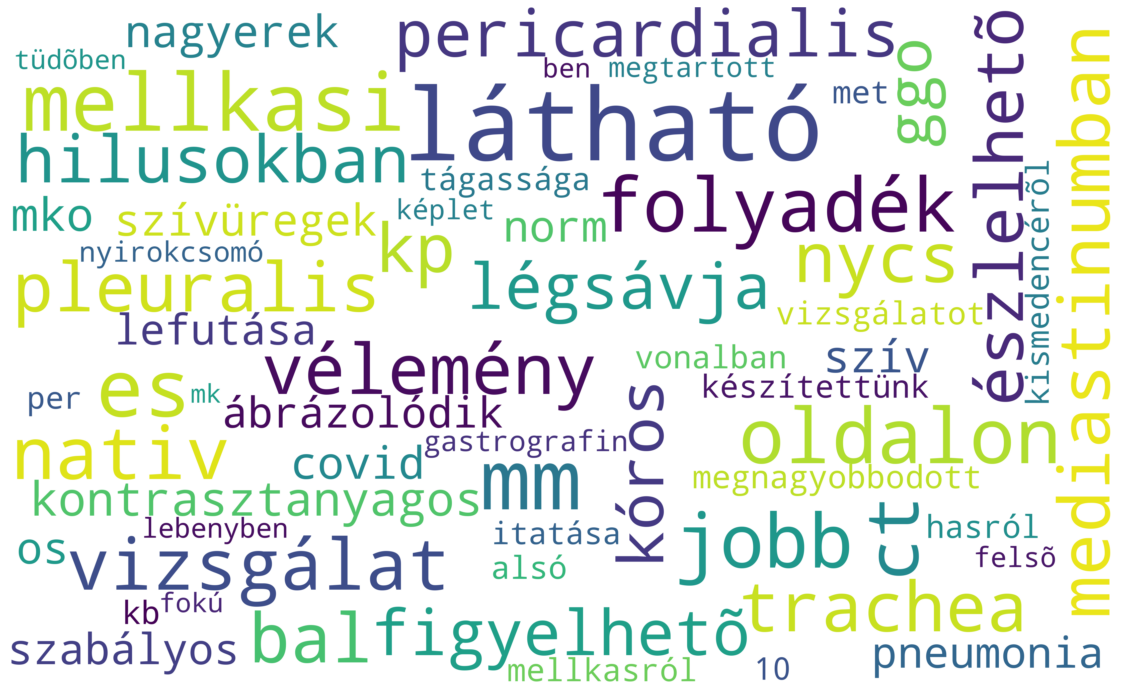

In [29]:
_ = show_wordcloud(all_expert_texts, num_words=60, vectorizer=vectorizer, blacklist=None)

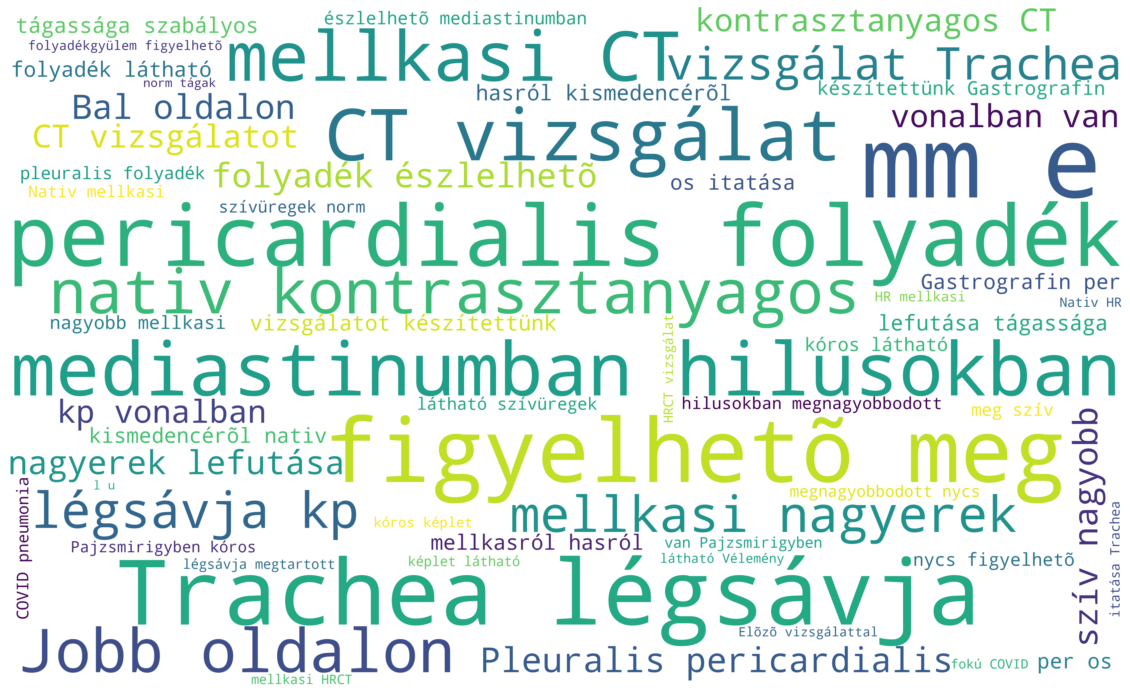

In [28]:
_ = show_wordcloud(all_expert_texts, num_words=60, vectorizer=None, blacklist=hun_stopwords+special_stopwords)